In [ ]:
!pip install openpyxl

In [ ]:
import pandas as pd
import time

years = [18, 19, 20, 21, 22, 23]
df_list = []
for year in years:
  url = f'http://peaoc.pea.co.th/loadprofile/files/07/dt07{year}0630.xls'
  #print(url)
  df = df = pd.read_excel(url, sheet_name='Source', header=4)
  tmp_df = df.copy() #do not touch any real data
  #range 0 to 96 will get 0 to 95
  tmp_df.iloc[0:96, 1:6] = tmp_df.iloc[1:97, 1:6] #move one row up
  tmp_df.drop(index = 96, inplace = True) #drop last row
  if (tmp_df.WORKDAY.iloc[-1] < tmp_df.WORKDAY.iloc[0]) & (tmp_df.WORKDAY.iloc[-1] < tmp_df.WORKDAY.iloc[-2]):
    print('bad data')
    tmp_df.iloc[95, 1:6] = tmp_df.iloc[94, 1:6] #substitute with data before
  df_list.append(tmp_df)
  time.sleep(2)

bad data
bad data
bad data
bad data


In [ ]:
df = df = pd.read_excel(url, sheet_name='Source', header=4)
df

,TIME,PEAKDAY,WORKDAY,SATURDAY,SUNDAY,HOLIDAY
0,00:00,NaN,NaN,NaN,NaN,NaN
1,00:15,341499.76,309670.769091,331015.4950,286575.1650,NaN
2,00:30,335998.68,307257.236364,330905.6075,278289.8375,NaN
3,00:45,334518.37,305170.528636,327864.3025,278163.2100,NaN
4,01:00,331455.01,305840.566364,330532.5100,280462.3600,NaN
...,...,...,...,...,...,...
92,23:00,358672.57,352414.544091,311025.4325,253528.3850,NaN
93,23:15,353151.92,348740.176818,306981.1800,250081.1975,NaN
94,23:30,356000.88,348408.518182,302855.5775,252016.6650,NaN
95,23:45,362082.63,347042.701364,302125.6925,250481.9850,NaN


In [ ]:
tmp_df = df.copy() #do not touch any real data
#range 0 to 96 will get 0 to 95
tmp_df.iloc[0:96, 1:6] = tmp_df.iloc[1:97, 1:6] #move one row up
tmp_df.drop(index = 96, inplace = True) #drop last row
if (tmp_df.WORKDAY.iloc[-1] < tmp_df.WORKDAY.iloc[0]) & (tmp_df.WORKDAY.iloc[-1] < tmp_df.WORKDAY.iloc[-2]):
  print('bad data')
  tmp_df.iloc[95, 1:6] = tmp_df.iloc[94, 1:6] #substitute with data before
tmp_df


,TIME,PEAKDAY,WORKDAY,SATURDAY,SUNDAY,HOLIDAY
0,00:00,341499.76,309670.769091,331015.4950,286575.1650,NaN
1,00:15,335998.68,307257.236364,330905.6075,278289.8375,NaN
2,00:30,334518.37,305170.528636,327864.3025,278163.2100,NaN
3,00:45,331455.01,305840.566364,330532.5100,280462.3600,NaN
4,01:00,328360.31,308262.909091,335123.6875,280574.1175,NaN
...,...,...,...,...,...,...
91,22:45,358672.57,352414.544091,311025.4325,253528.3850,NaN
92,23:00,353151.92,348740.176818,306981.1800,250081.1975,NaN
93,23:15,356000.88,348408.518182,302855.5775,252016.6650,NaN
94,23:30,362082.63,347042.701364,302125.6925,250481.9850,NaN


<Axes: >

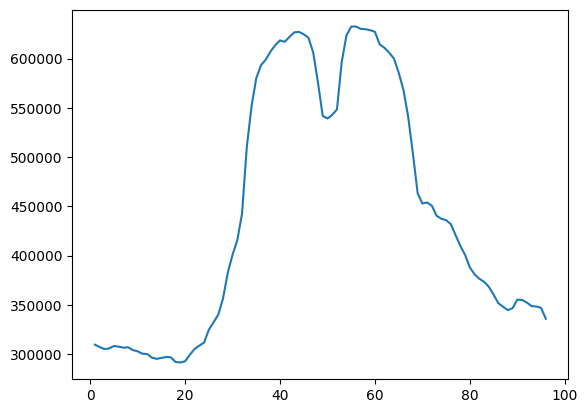

In [ ]:
df.WORKDAY.plot()

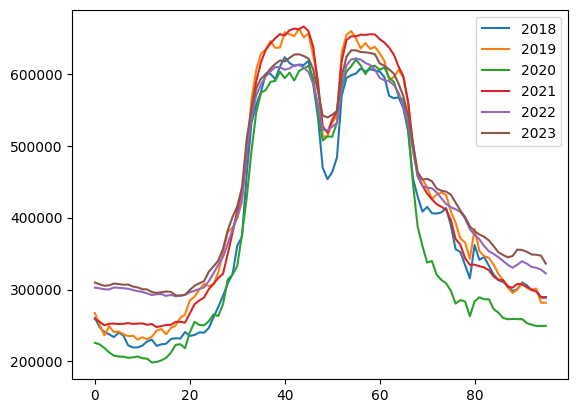

In [ ]:
import matplotlib.pyplot as plt
for df in df_list:
  plt.plot(df.WORKDAY)
plt.legend(['2018', '2019', '2020', '2021', '2022', '2023' ])
plt.show()

In [ ]:
from datetime import datetime

tmp_df = df_list[0].copy()
tmp_df.set_index(pd.to_datetime(tmp_df.TIME), inplace = True)
#hr_df = tmp_df.resample('1H').mean() #change datetime format
tmp_df[2:6]
#hr_df

#cond = (hr_df.index.hour >= 9) & (hr_df.index.hour < 17) & (hr_df.index.hour != 12)
cond = (tmp_df.index.hour >= 9) & (tmp_df.index.hour < 17) & (tmp_df.index.hour != 12)
#hr_df.loc[cond,:].mean()
tmp_df.loc[cond,'WORKDAY'].mean()
#hr_df.loc[cond,'WORKDAY'].mean()
#print("only working hour")

586826.9752380953

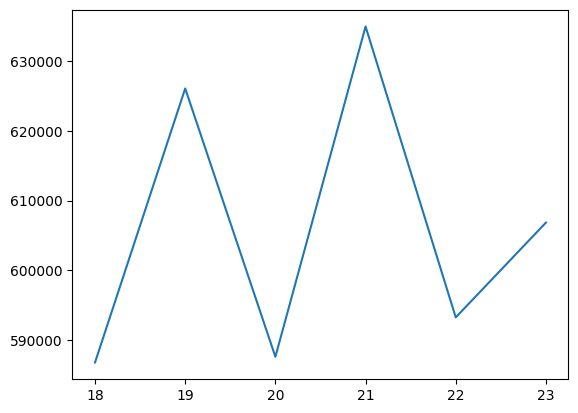

In [ ]:
workday_avgkwh = []

for df in df_list:
  tmp_df = df.copy()
  tmp_df.set_index( pd.to_datetime(tmp_df.TIME), inplace = True)
  cond = (tmp_df.index.hour >= 9) & (tmp_df.index.hour < 17) & (tmp_df.index.hour != 12)
  val = tmp_df.loc[cond,'WORKDAY'].mean()
  workday_avgkwh.append(val)
plt.plot(years, workday_avgkwh)
